In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Gathering Data

**Since all the csv files contain the same columns, it should be better to just combine all of them for easier**

In [2]:
dataset_path = './data/'
datasets = [os.path.join(dataset_path, filename) for filename in os.listdir(dataset_path)]

def load_and_cat_dataframes(paths):
    dataframes = []
    for path in paths:
        df = pd.read_csv(path)
        dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True)

df = load_and_cat_dataframes(datasets)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


# Assessing Data

**Assess and find out what the data is about and figure out what information is in the dataframe**

In [3]:
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Guanyuan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


**There are several notes that can be taken from the general structure of the csv and the above df.describe and df.info:**
- The "No" column is the index of the data grouped by station
- The "year", "month", "day", and "hour" columns can be turned into a single time column
- The data has a time range from 2013 to 2017
- The data contains the concentration density(?) of some atmospheric gas(?) in some metric I'm not sure

**Since there are some terms I am not familiar with, I use ChatGPT to find out more about them, and here is what it said word to word:**

- PM2.5: Particulate matter with a diameter of 2.5 micrometers or less (μg/m³). These fine particles can affect human health.
- PM10 : Particulate matter with a diameter of 10 micrometers or less (μg/m³). These are larger than PM2.5 but still harmful.
- SO2  : Sulfur dioxide concentration (μg/m³), a gas commonly associated with air pollution.
- NO2  : Nitrogen dioxide concentration (μg/m³), another pollutant that can affect respiratory health.
- CO   : Carbon monoxide concentration (mg/m³), a harmful gas resulting from incomplete combustion.
- O3   : Ozone concentration (μg/m³), which can contribute to smog and affect respiratory health.
- TEMP : Temperature (°C), the air temperature at the time of recording.
- PRES : Atmospheric pressure (hPa or millibars), which can influence weather patterns.
- DEWP : Dew point (°C), the temperature at which air becomes saturated and dew forms.
- RAIN : Precipitation amount (mm), indicating how much rainfall occurred.
- wd   : Wind direction, likely categorical (e.g., "N" for north, "S" for south).
- WSPM : Wind speed (m/s), indicating the speed of the wind.

In [23]:
df.isnull().sum().rename('null_count').to_frame().T

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
null_count,0,0,0,0,0,8739,6449,9021,12116,20701,13277,398,393,403,390,1822,318,0


In [6]:
print("Number of duplicated rows:", df.duplicated().sum())

Number of duplicated rows: 0


# Cleaning Data

In [132]:
cleaned_df = df.copy()

**Combine "year", "month", "day", "hour" columns into one column "time" to make the dataframe easier to read**

In [133]:
cleaned_df['time'] = pd.to_datetime(cleaned_df[['year', 'month', 'day', 'hour']])
cleaned_df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
cleaned_df = cleaned_df.sort_values(by=['station', 'time']).reset_index(drop=True)
cleaned_df.iloc[170:175]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,time
170,171,339.0,400.0,NaN,162.0,3899.0,84.0,2.5,998.2,-1.9,0.0,SW,0.8,Aotizhongxin,2013-03-08 02:00:00
171,172,324.0,373.0,71.0,154.0,NaN,84.0,1.8,997.9,-1.8,0.0,N,0.0,Aotizhongxin,2013-03-08 03:00:00
172,173,322.0,345.0,62.0,NaN,3299.0,84.0,1.3,998.5,-1.8,0.0,W,1.0,Aotizhongxin,2013-03-08 04:00:00
173,174,315.0,346.0,47.0,144.0,3200.0,84.0,1.4,999.0,-1.5,0.0,SW,0.8,Aotizhongxin,2013-03-08 05:00:00
174,175,310.0,327.0,45.0,146.0,3299.0,84.0,1.1,999.7,-1.8,0.0,WSW,0.8,Aotizhongxin,2013-03-08 06:00:00


**Cleaning missing values**

To take care of the missing values, interpolation is chosen since the data is taken every hour which means it should be possible to interpolate the missing values with data from several hours before and after.

After everything is interpolated there are still missing values in the NO2 column and after a bit of investigating it's because there are missing values at the start which makes it impossible to interpolate. To clean these missing values I decide to use back fill since it seems appropriate.

the wd (wind direction) column is ignored since its a string.

In [134]:
interpolate_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
interpolated_df = cleaned_df.copy()

for column in interpolate_columns:
    interpolated_df[column] = interpolated_df.groupby('station')[column].apply(lambda group: group.interpolate()).reset_index(drop=True)

# # Split the DataFrame by station
# station_groups = cleaned_df.groupby('station')

# # Interpolate for each group and combine
# interpolated_dfs = []
# for station, group in station_groups:
#     for column in interpolate_columns:
#         group[column] = group[column].interpolate(method='polynomial', order=2)
#     interpolated_dfs.append(group)

# # Combine back into a single DataFrame
# cleaned_df = pd.concat(interpolated_dfs)

interpolated_df.isnull().sum().rename('null_count').to_frame().T

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,time
null_count,0,0,0,0,22,0,0,0,0,0,0,1822,0,0,0


In [135]:
interpolated_df['NO2'] = interpolated_df['NO2'].bfill()
interpolated_df.isnull().sum().rename('null_count').to_frame().T

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,time
null_count,0,0,0,0,0,0,0,0,0,0,0,1822,0,0,0


**Make another version of cleaned data using dropna to cross check**

In [136]:
na_dropped_df = cleaned_df.dropna(subset=interpolate_columns)
na_dropped_df.isnull().sum().rename('null_count').to_frame().T

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,time
null_count,0,0,0,0,0,0,0,0,0,0,0,1417,0,0,0


## Validating Interpolated Data

In [128]:
interpolated_df.describe()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,time
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768
mean,17532.500000,79.839718,104.910268,15.913090,50.599018,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,1.730034,2015-03-01 11:30:00.000001024
min,1.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00
50%,17532.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000,2015-03-01 11:30:00
75%,26298.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00
max,35064.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,10122.116943,80.950217,92.431422,21.896609,35.171921,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,1.246674,NaN


In [138]:
na_dropped_df.describe()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,time
count,383585.000000,383585.000000,383585.000000,383585.000000,383585.000000,383585.000000,383585.000000,383585.000000,383585.000000,383585.000000,383585.000000,383585.000000,383585
mean,17995.599661,79.523931,104.643039,15.622388,50.625569,1231.862104,57.241318,13.493708,1010.828913,2.414531,0.064898,1.732421,2015-03-20 18:35:58.779931136
min,1.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000,2013-03-01 00:00:00
25%,9638.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.000000,3.100000,1002.400000,-9.000000,0.000000,0.900000,2014-04-06 13:00:00
50%,18161.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,2.900000,0.000000,1.400000,2015-03-27 16:00:00
75%,26568.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000,2016-03-11 23:00:00
max,35064.000000,844.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,10011.119170,80.205852,91.389334,21.290076,35.081258,1158.872753,56.675282,11.426799,10.451198,13.790993,0.822480,1.242827,NaN


the std and the mean difference between the dropped and interpolated data seems small enough so I'll proceed to the analysis part with the interpolated dataframe.

# Data Analysis

**Question Definitions**

Several questions that will be asked when analyzing the data are as follows:
- How much effect does the rain, wind speed, pressure, and temprature have on pollution?
- How does the pollution level evolve as the years go by?
- How does seasons affect pollution levels

## How much effect does the rain, wind speed, pressure, dew point, and temprature have on pollution?

In [144]:
correlation = interpolated_df[interpolate_columns].corr()
correlation

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.878874,0.478223,0.664317,0.780165,-0.149508,-0.131607,0.019862,0.113045,-0.014452,-0.271425
PM10,0.878874,1.000000,0.460572,0.645598,0.691887,-0.110443,-0.096078,-0.018375,0.067674,-0.026505,-0.178200
SO2,0.478223,0.460572,1.000000,0.495827,0.522678,-0.165311,-0.320237,0.221235,-0.266121,-0.040028,-0.108536
NO2,0.664317,0.645598,0.495827,1.000000,0.694030,-0.465913,-0.277231,0.176605,-0.032512,-0.043661,-0.395716
CO,0.780165,0.691887,0.522678,0.694030,1.000000,-0.306979,-0.324057,0.188045,-0.060315,-0.013281,-0.290413
O3,-0.149508,-0.110443,-0.165311,-0.465913,-0.306979,1.000000,0.592248,-0.446725,0.312980,0.023361,0.294351
TEMP,-0.131607,-0.096078,-0.320237,-0.277231,-0.324057,0.592248,1.000000,-0.813312,0.820247,0.037647,0.032601
PRES,0.019862,-0.018375,0.221235,0.176605,0.188045,-0.446725,-0.813312,1.000000,-0.750271,-0.060952,0.065400
DEWP,0.113045,0.067674,-0.266121,-0.032512,-0.060315,0.312980,0.820247,-0.750271,1.000000,0.086259,-0.296771
RAIN,-0.014452,-0.026505,-0.040028,-0.043661,-0.013281,0.023361,0.037647,-0.060952,0.086259,1.000000,0.020975


In [145]:
threshold = 0.2
correlation[correlation.abs() > threshold]

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.878874,0.478223,0.664317,0.780165,NaN,NaN,NaN,NaN,NaN,-0.271425
PM10,0.878874,1.000000,0.460572,0.645598,0.691887,NaN,NaN,NaN,NaN,NaN,NaN
SO2,0.478223,0.460572,1.000000,0.495827,0.522678,NaN,-0.320237,0.221235,-0.266121,NaN,NaN
NO2,0.664317,0.645598,0.495827,1.000000,0.694030,-0.465913,-0.277231,NaN,NaN,NaN,-0.395716
CO,0.780165,0.691887,0.522678,0.694030,1.000000,-0.306979,-0.324057,NaN,NaN,NaN,-0.290413
O3,NaN,NaN,NaN,-0.465913,-0.306979,1.000000,0.592248,-0.446725,0.312980,NaN,0.294351
TEMP,NaN,NaN,-0.320237,-0.277231,-0.324057,0.592248,1.000000,-0.813312,0.820247,NaN,NaN
PRES,NaN,NaN,0.221235,NaN,NaN,-0.446725,-0.813312,1.000000,-0.750271,NaN,NaN
DEWP,NaN,NaN,-0.266121,NaN,NaN,0.312980,0.820247,-0.750271,1.000000,NaN,-0.296771
RAIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [165]:
variables = ['TEMP', 'PRES', 'DEWP', 'WSPM', 'RAIN']

def plot_scatter(dataframe, column, variables=variables):
  fig, axs = plt.subplots(2, 3, figsize=(15, 8))

  axs = axs.flatten()

  for i, var in enumerate(variables):
      sns.scatterplot(data=interpolated_df, x=var, y=column, ax=axs[i])
      axs[i].set_title(f'{column} vs {var}')
      axs[i].set_xlabel(var)
      axs[i].set_ylabel(column)

  fig.delaxes(axs[-1])
  plt.tight_layout()
  plt.show()

In [151]:
particles = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

### Plots

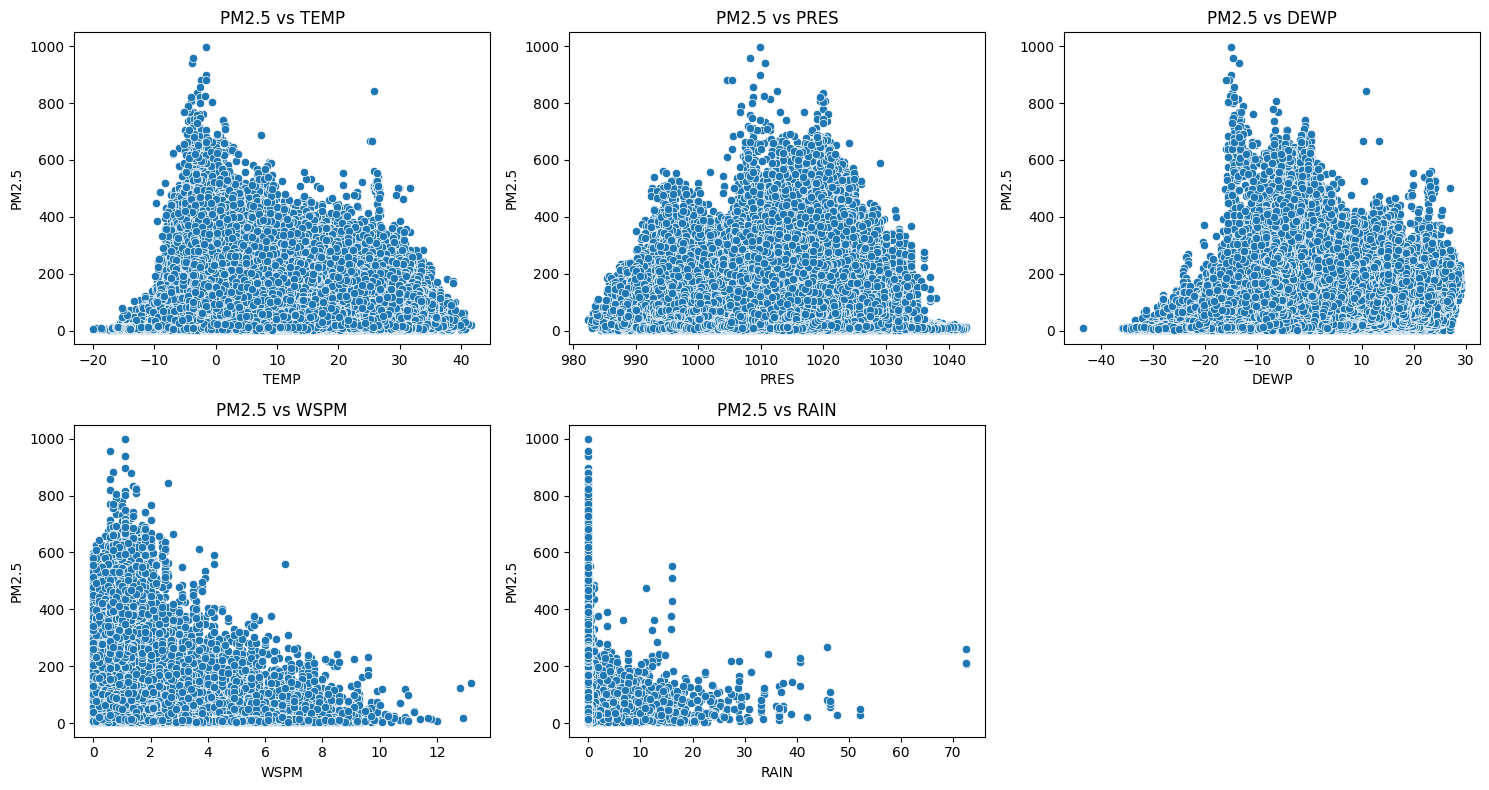

In [164]:
plot_scatter(interpolated_df, particles[0]) # PM2.5

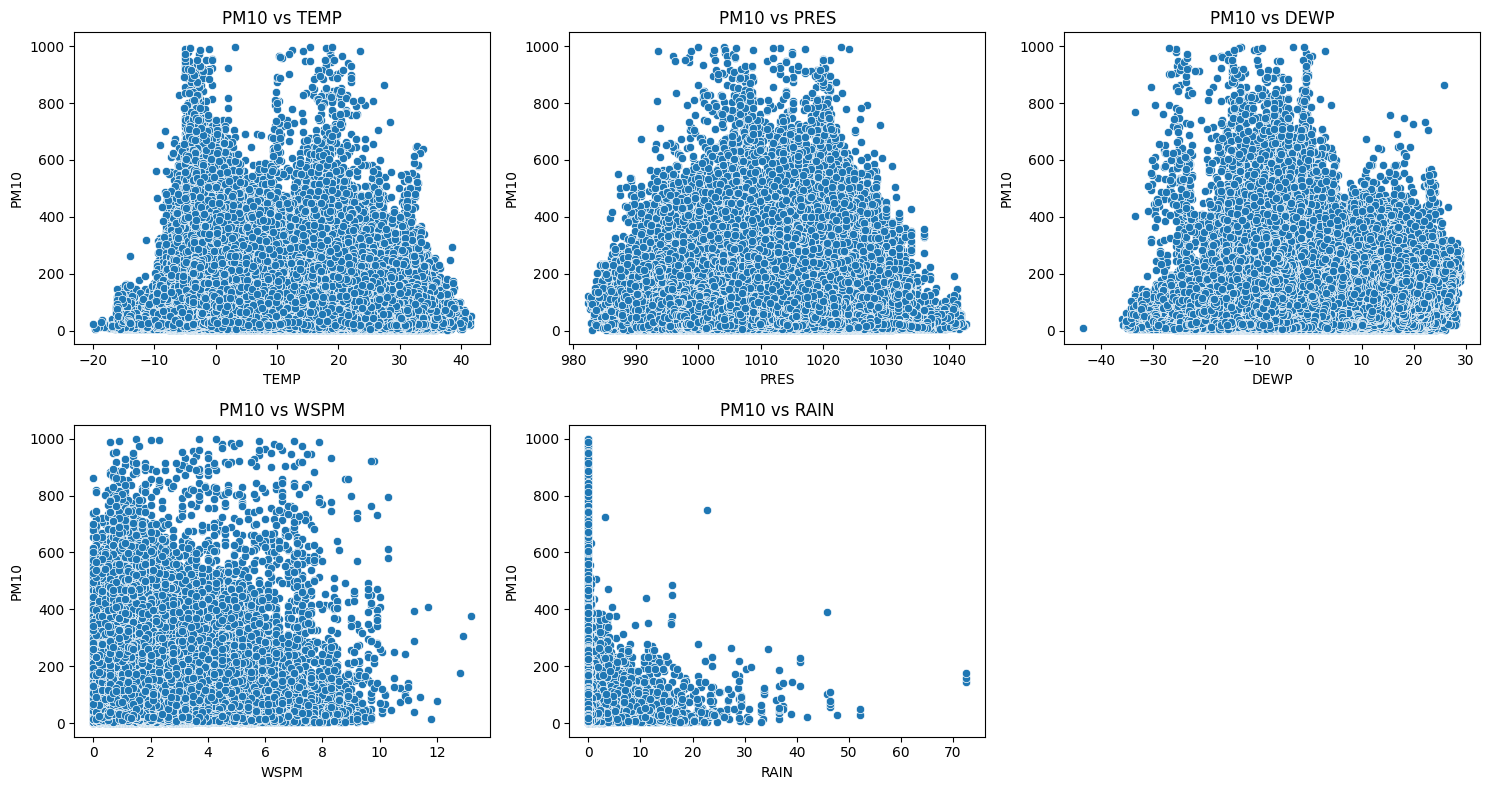

In [166]:
plot_scatter(interpolated_df, particles[1]) # PM10

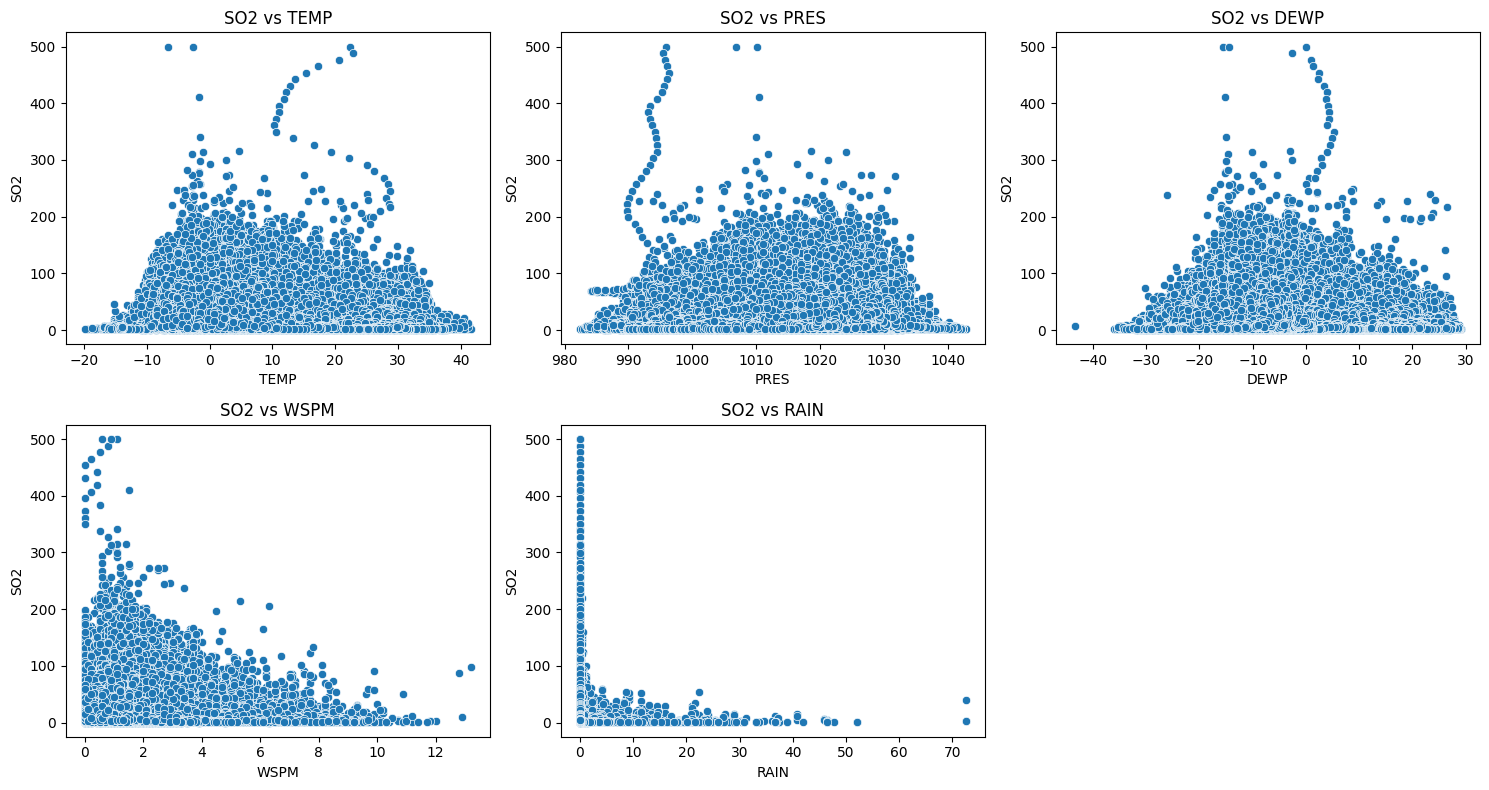

In [167]:
plot_scatter(interpolated_df, particles[2]) # SO2

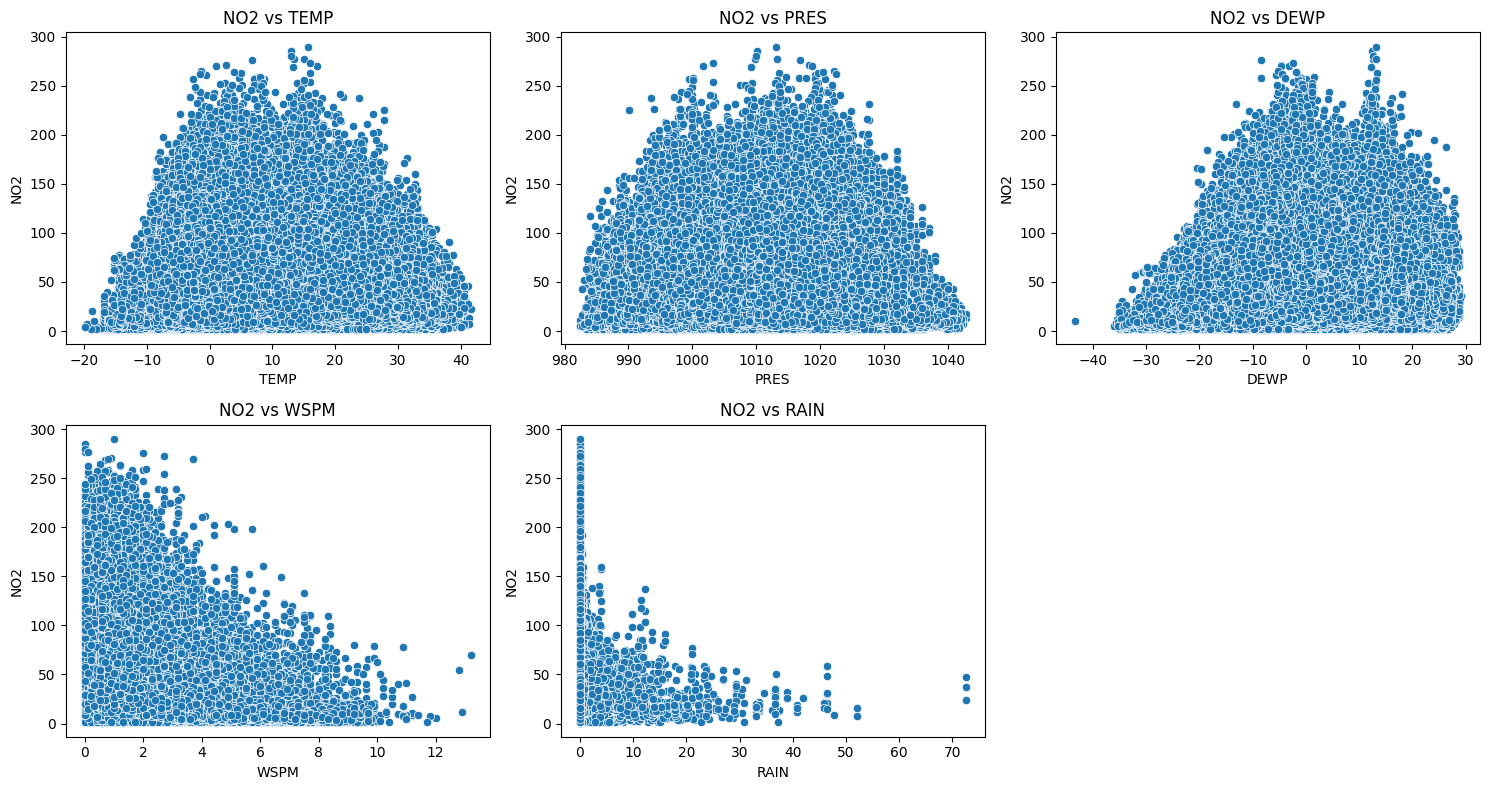

In [168]:
plot_scatter(interpolated_df, particles[3]) # NO2

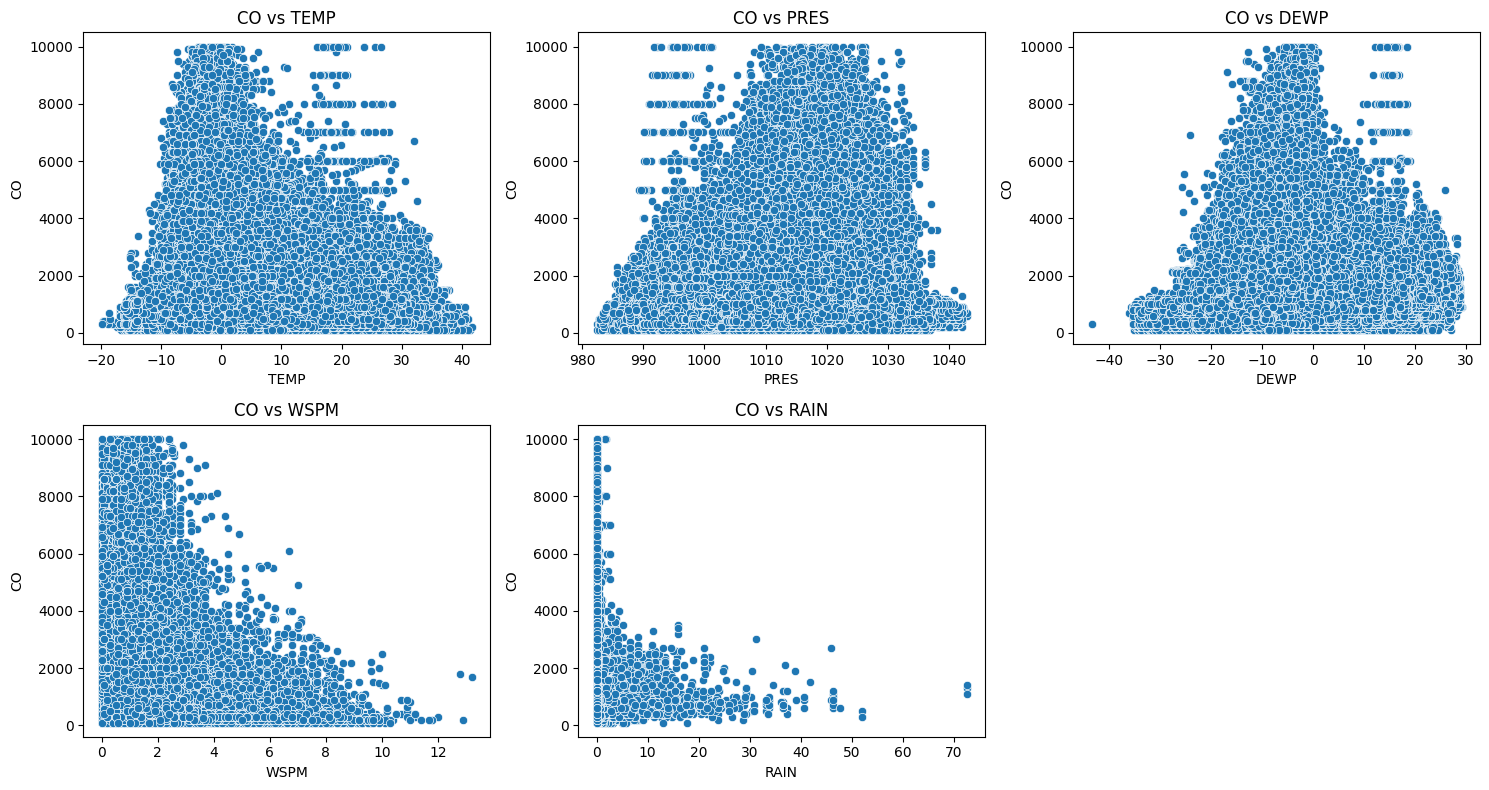

In [169]:
plot_scatter(interpolated_df, particles[4]) # CO

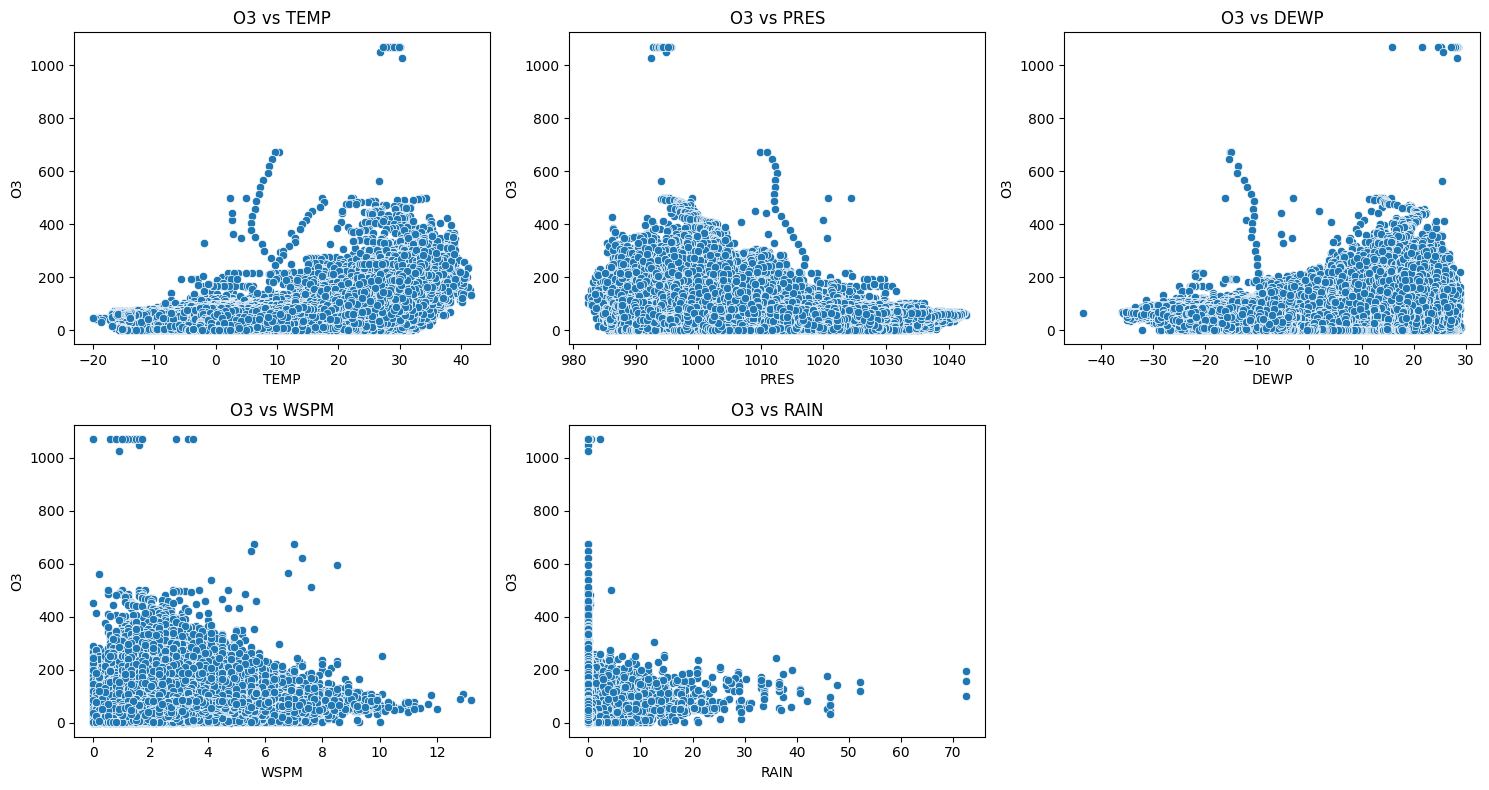

In [170]:
plot_scatter(interpolated_df, particles[5]) # O3

### Conclusion

asdfg

## How does the pollution level evolve as the years go by?